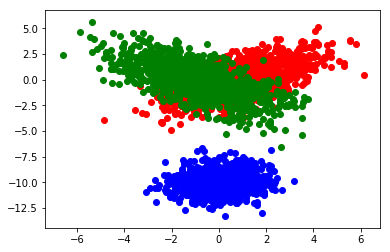

In [212]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

X = np.zeros((3000, 2))

lambda1 = [[4,0],[0,1]]
U = [[1/math.sqrt(2), -1/math.sqrt(2)], [1/math.sqrt(2), 1/math.sqrt(2)]]
sigma1 = np.asarray(U) @ np.asarray(lambda1) @ np.asarray(U).transpose()
lambda2 = [[1,0],[0,5]]
sigma2 = np.asarray(U) @ np.asarray(lambda2) @ np.asarray(U).transpose()

X[0:1000] = np.random.multivariate_normal([1,0], sigma1, 1000)
X[1000:2000] = np.random.multivariate_normal([-1,0], sigma2, 1000)
X[2000:3000] = np.random.multivariate_normal([0,-10], np.identity(2),1000)
    
plt.scatter(X[0:1000,0],X[0:1000,1], c='r')
plt.scatter(X[1000:2000,0],X[1000:2000,1], c='g')
plt.scatter(X[2000:3000,0],X[2000:3000,1], c='b')
plt.show()

k means converged after  33  iterations


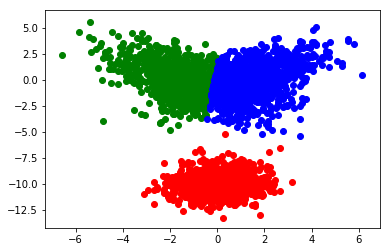

In [213]:
cluster = np.random.randint(3,size=3000)
# mean = np.zeros((3,2))
# population = np.zeros((3,1))
change = True
num_of_iter = 0
while(change):
    population = np.zeros((3,1))
    mean = np.zeros((3,2))
    for i in range(3000):
        population[cluster[i]] += 1
        mean[cluster[i]] += X[i]
    for i in range(3):
        mean[i] = mean[i]/population[i]
    change = False
    for i in range(3000):
        for j in range(3):
            if j != cluster[i]:
                if np.linalg.norm(X[i]-mean[j]) < np.linalg.norm(X[i]-mean[cluster[i]]):
                    cluster[i] = j
                    change = True
    num_of_iter += 1

print("k-means converged after ", num_of_iter, " iterations")
x0 = []
x1 = []
x2 = []
for i in range(3000):
    if cluster[i] == 0:
        x0.append(X[i])
    elif(cluster[i] == 1):
        x1.append(X[i])
    else:
        x2.append(X[i])
        
x0 = np.asarray(x0)
x1 = np.asarray(x1)
x2 = np.asarray(x2)

plt.scatter(x0[:,0],x0[:,1], c='r')
plt.scatter(x1[:,0],x1[:,1], c='g')
plt.scatter(x2[:,0],x2[:,1], c='b')
plt.show()